# Imports

In [34]:
import numpy as np
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Conv2D, Flatten, MaxPooling2D
from keras import optimizers
from keras.utils import plot_model
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics
from sklearn.model_selection import KFold

# Loading data

In [2]:
from google.colab import drive
drive.mount("/content/drive")
%cd  /content/drive/MyDrive/M2_deeplearning/Data
%pwd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/M2_deeplearning/Data


'/content/drive/MyDrive/M2_deeplearning/Data'

In [3]:
train_images = np.load("train_images.npy")
train_labels = np.load("train_labels.npy")
test_images = np.load("test_images.npy")
test_labels = np.load("test_labels.npy")

# Data preprocessing

In [4]:
train_images = train_images.astype("float32")
test_images = test_images.astype("float32")

In [5]:
print(np.max(train_images))
print(np.max(test_images))

1.0
255.0


In [6]:
# Normalization of test_images
test_images = test_images / 255

In [7]:
# Shuffle
permutation = np.random.permutation(len(train_images))
train_images = train_images[permutation]
train_labels = train_labels[permutation]

In [8]:
train_images_flat = train_images.reshape(train_images.shape[0], -1) # applatir les images
test_images_flat = test_images.reshape(test_images.shape[0], -1) # applatir les images

onehot_Y = to_categorical(train_labels)
onehot_Y_test = to_categorical(test_labels)

# Data visualization

In [9]:
print(len(train_images))
print(train_images.shape)
print(len(test_images))
print(test_images.shape)

60000
(60000, 28, 28, 1)
10000
(10000, 28, 28, 1)


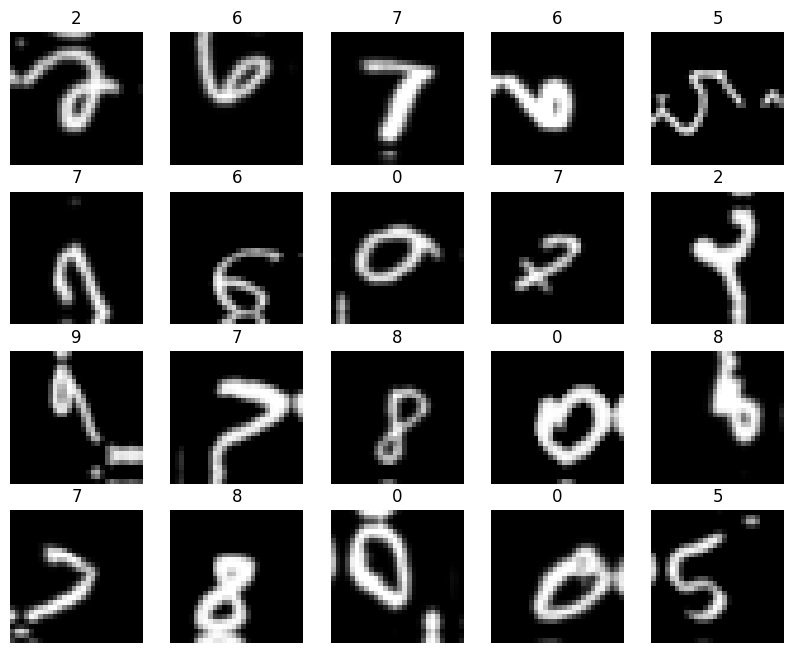

In [11]:
plt.figure(figsize=(10, 10))
for i in range(20):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(train_labels[i])
    plt.axis("off")
plt.show()

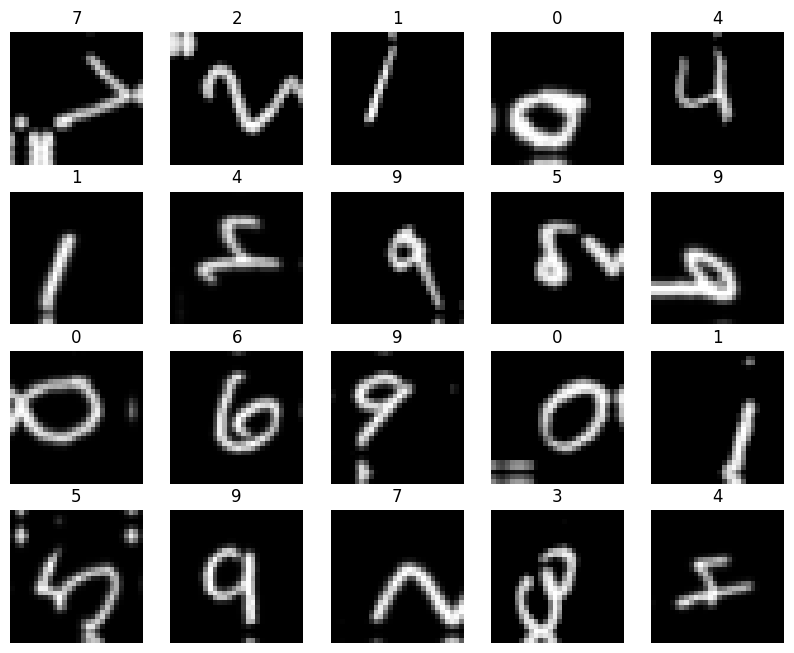

In [13]:
plt.figure(figsize=(10, 10))
for i in range(20):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(test_images[i], cmap='gray')
    plt.title(test_labels[i])
    plt.axis("off")
plt.show()

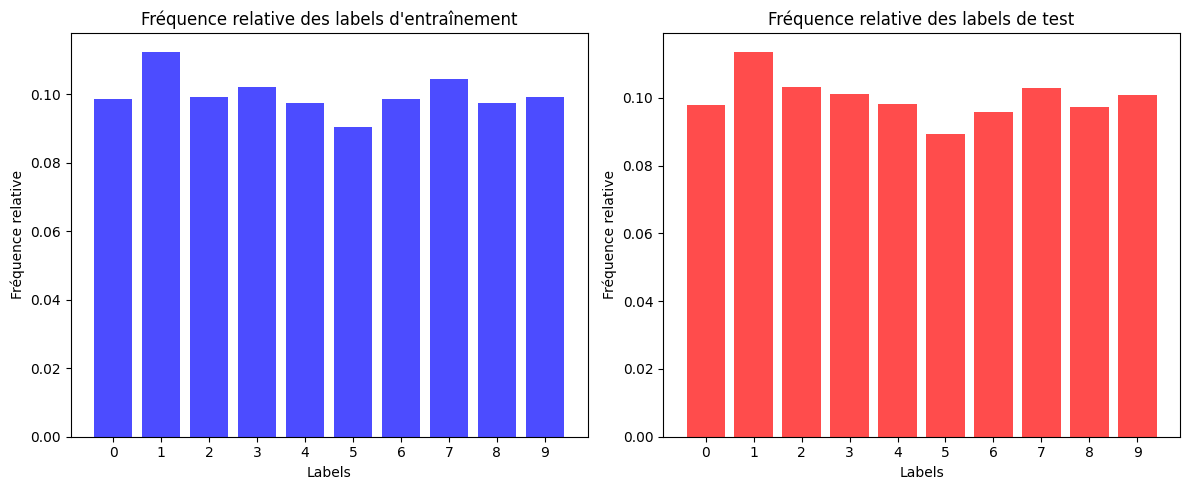

In [20]:
# Calculate relative frequencies for drive labels
train_unique, train_counts = np.unique(train_labels, return_counts=True)
train_freq = train_counts / len(train_labels)

# Calculate relative frequencies for test labels
test_unique, test_counts = np.unique(test_labels, return_counts=True)
test_freq = test_counts / len(test_labels)

# Initialize the figure
plt.figure(figsize=(12, 5))

# Relative frequency distribution of training labels
plt.subplot(1, 2, 1)
plt.bar(train_unique, train_freq, color='blue', alpha=0.7)
plt.title('Fréquence relative des labels d\'entraînement')
plt.xlabel('Labels')
plt.ylabel('Fréquence relative')
plt.xticks(train_unique)

# Relative frequency distribution of test labels
plt.subplot(1, 2, 2)
plt.bar(test_unique, test_freq, color='red', alpha=0.7)
plt.title('Fréquence relative des labels de test')
plt.xlabel('Labels')
plt.ylabel('Fréquence relative')
plt.xticks(test_unique)

# Show distributions
plt.tight_layout()
plt.show()

# Dense Neural Network

In [21]:
def dense_model():
	# Create model
  model = Sequential()
  model.add(Dense(256, input_dim=784, activation='relu'))
  model.add(Dropout(0.3))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(10, activation='softmax'))
	# Compile model
  opt = optimizers.RMSprop(learning_rate=0.001)
  model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
  return model

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

None


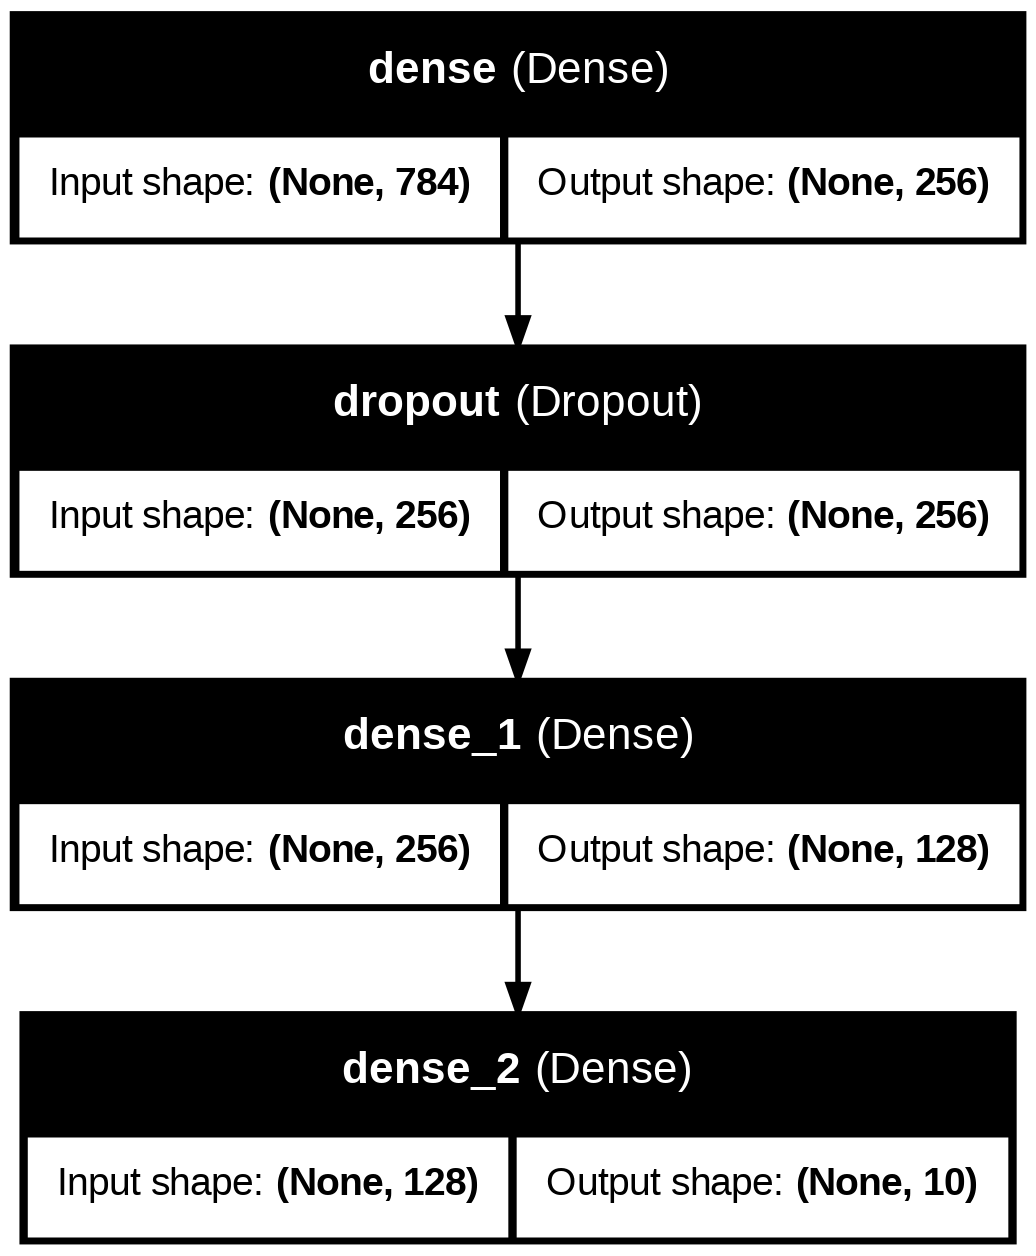

In [22]:
model = dense_model()
print(f'{model.summary()}')
plot_model(model, to_file="model.png",
               show_shapes=True, show_layer_names=True)

In [23]:
history = model.fit(train_images_flat, onehot_Y, validation_split = 0.2, epochs=20, batch_size=128)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.2697 - loss: 2.0263 - val_accuracy: 0.5579 - val_loss: 1.3265
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5535 - loss: 1.3387 - val_accuracy: 0.6658 - val_loss: 1.0459
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6340 - loss: 1.1168 - val_accuracy: 0.7206 - val_loss: 0.8853
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6723 - loss: 1.0053 - val_accuracy: 0.7517 - val_loss: 0.7949
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7160 - loss: 0.8934 - val_accuracy: 0.7638 - val_loss: 0.7526
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.7269 - loss: 0.8411 - val_accuracy: 0.7842 - val_loss: 0.6904
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7450 - loss: 0.7830 - val_accuracy: 0.7970 - val_loss: 0.6513
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7632 - loss: 0.7350 - val_accuracy: 0

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


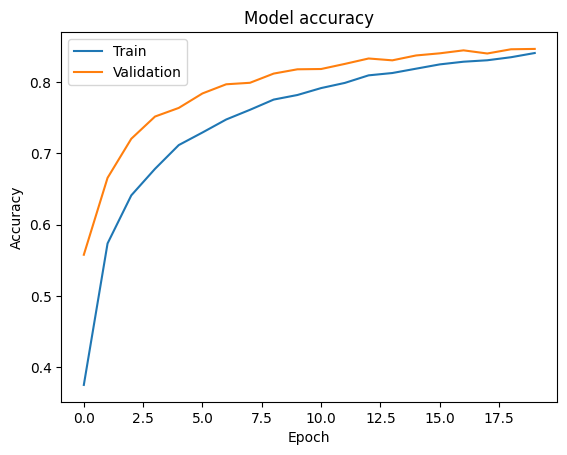

In [24]:
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


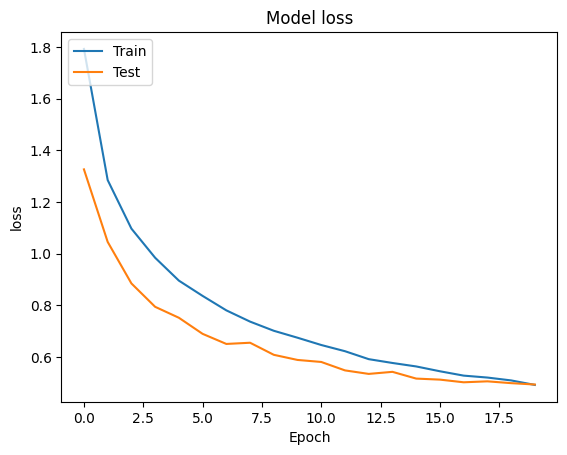

In [25]:
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [26]:
model.evaluate(test_images_flat, onehot_Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8429 - loss: 0.5273


[0.4738326668739319, 0.8561999797821045]

In [27]:
y_pred = model.predict(test_images_flat)
y_pred_classes = np.argmax(y_pred,axis = 1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


<Axes: >

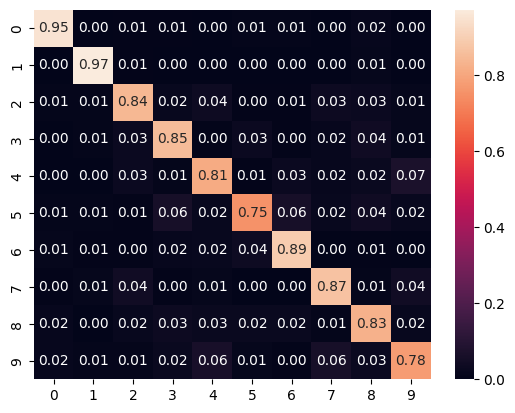

In [28]:
sns.heatmap(sklearn.metrics.confusion_matrix(test_labels, y_pred_classes, normalize="true"), fmt=".2f", annot=True)

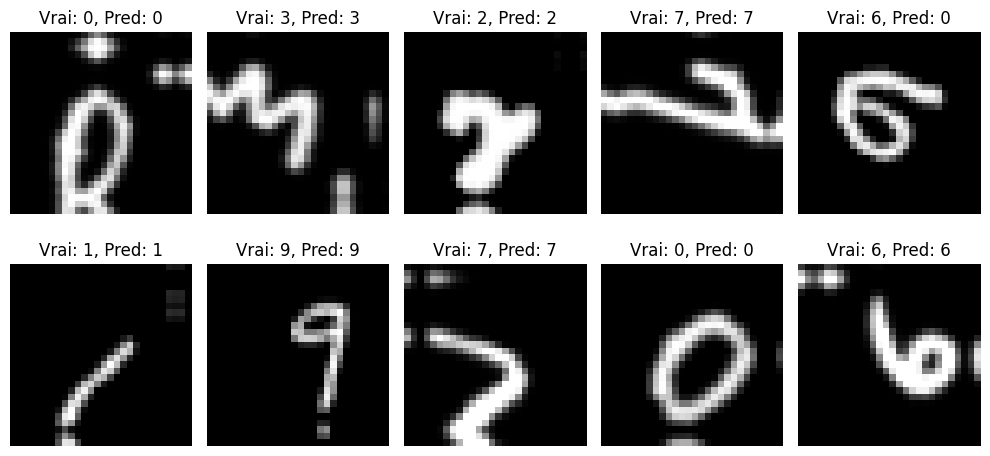

In [33]:
# Generate random hints to select random images in the test set
random_indices = np.random.choice(len(test_images), 10, replace=False)

plt.figure(figsize=(10, 5))
for i, idx in enumerate(random_indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_images[idx].reshape(28, 28), cmap="gray")
    plt.axis('off')
    plt.title(f"Vrai: {test_labels[idx]}, Pred: {y_pred_classes[idx]}")
plt.tight_layout()
plt.show()

## Cross validation

In [46]:
#history = model.fit(train_images_flat, onehot_Y, validation_split = 0.2, epochs=20, batch_size=128)
# Cross validation
# Variables to store the best model and precision
models_fold = []
fold_val_losses = []
fold_val_accuracies = []
fold_train_losses = []
fold_train_accuracies = []
not_all_val_losses = []
not_all_val_accuracies = []
not_all_train_losses = []
not_all_train_accuracies = []

# KFold configuration
kfold = KFold(n_splits=5, shuffle=True)

# Fold course
for fold, (train_idx, val_idx) in enumerate(kfold.split(train_images_flat)):
    print(f"Fold {fold+1}")

    # Create a template for this fold
    model = dense_model()

    # Separate training and validation data for this fold
    X_fold_train, X_fold_val = train_images_flat[train_idx], train_images_flat[val_idx]
    Y_fold_train, Y_fold_val = onehot_Y[train_idx], onehot_Y[val_idx]

    # save train history
    history = model.fit(X_fold_train, Y_fold_train, validation_data=(X_fold_val, Y_fold_val),
                        epochs=20, batch_size=128, verbose=0)

    # If this is the best accuracy so far, we save the model
    models_fold.append(model)

    # Save losses and details for this fold
    fold_train_losses.append(history.history['loss'])
    fold_train_accuracies.append(history.history['accuracy'])
    fold_val_losses.append(history.history['val_loss'])
    fold_val_accuracies.append(history.history['val_accuracy'])
    not_all_train_losses.append(history.history['loss'][-1])
    not_all_train_accuracies.append(history.history['accuracy'][-1])
    not_all_val_losses.append(history.history['val_loss'][-1])
    not_all_val_accuracies.append(history.history['val_accuracy'][-1])


Fold 1
Fold 2
Fold 3
Fold 4
Fold 5


In [47]:
mean_total_loss = np.mean(not_all_val_losses)
mean_total_accuracy = np.mean(not_all_val_accuracies)
std_val_loss = np.std(not_all_val_losses)
std_val_accuracy = np.std(not_all_val_accuracies)
print(f"Mean val losses: {mean_total_loss}")
print(f"Mean val accuracies: {mean_total_accuracy}")
print(f"Std val losses: {std_val_loss}")
print(f"Std val accuracies: {std_val_accuracy}")

mean_total_loss = np.mean(not_all_train_losses)
mean_total_accuracy = np.mean(not_all_train_accuracies)
std_train_loss = np.std(not_all_train_losses)
std_train_accuracy = np.std(not_all_train_accuracies)
print(f"Mean train losses: {mean_total_loss}")
print(f"Mean train accuracies: {mean_total_accuracy}")
print(f"Std train losses: {std_train_loss}")
print(f"Std train accuracies: {std_train_accuracy}")

Mean val losses: 0.5085848152637482
Mean val accuracies: 0.8460500001907348
Std val losses: 0.011502599861197138
Std val accuracies: 0.004602707727656532
Mean train losses: 0.4954047560691833
Mean train accuracies: 0.8391333222389221
Std train losses: 0.005167027358999957
Std train accuracies: 0.0018089491111669053


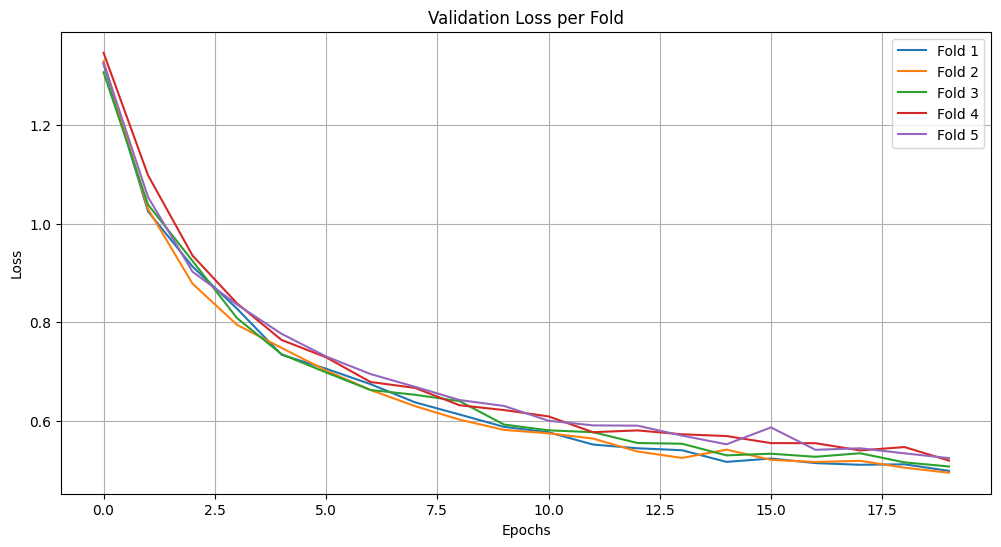

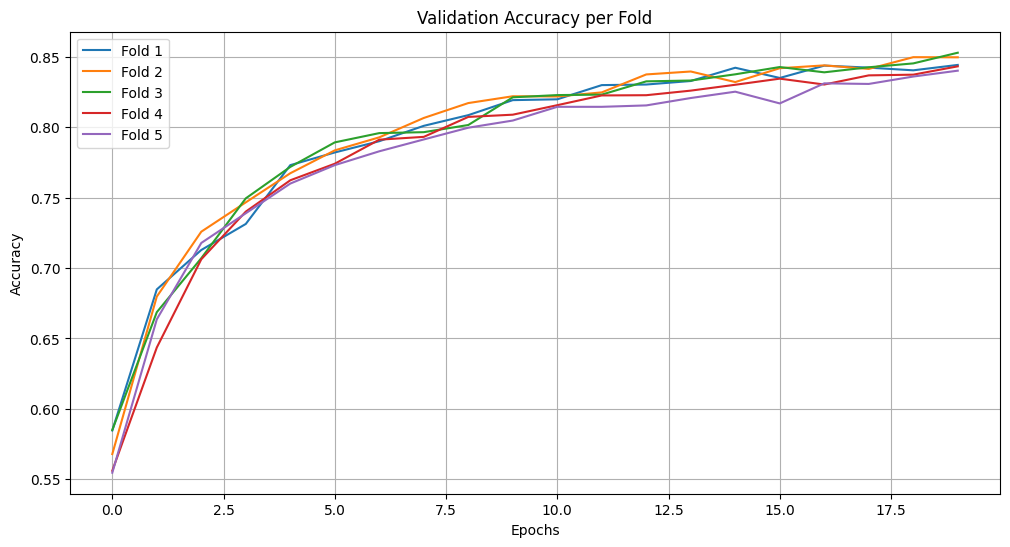

In [48]:
# Trace losses
plt.figure(figsize=(12, 6))

# Validation curves for each fold
for i in range(len(fold_val_losses)):
    plt.plot(fold_val_losses[i], label=f'Fold {i+1}')

plt.title('Validation Loss per Fold')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

# Tracing precision
plt.figure(figsize=(12, 6))

# Precision curves for each fold
for i in range(len(fold_val_accuracies)):
    plt.plot(fold_val_accuracies[i], label=f'Fold {i+1}')

plt.title('Validation Accuracy per Fold')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

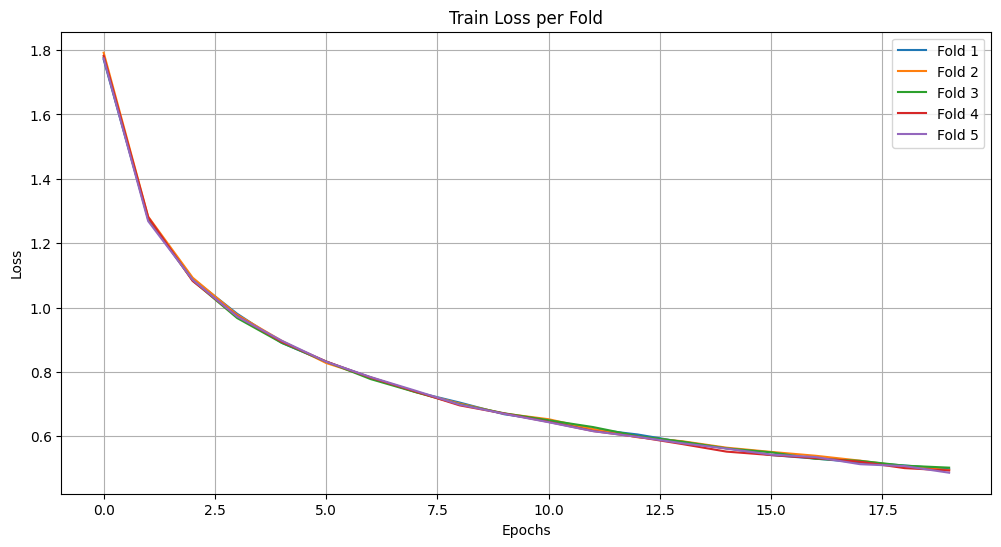

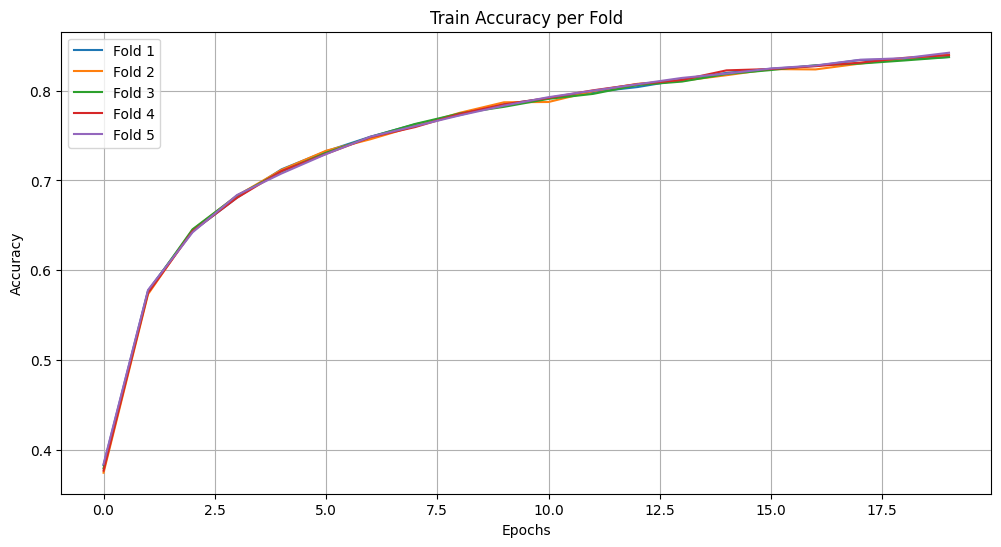

In [49]:
# Trace losses
plt.figure(figsize=(12, 6))

# Validation curves for each fold
for i in range(len(fold_train_losses)):
    plt.plot(fold_train_losses[i], label=f'Fold {i+1}')

plt.title('Train Loss per Fold')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

# Tracing precision
plt.figure(figsize=(12, 6))

# Precision curves for each fold
for i in range(len(fold_train_accuracies)):
    plt.plot(fold_train_accuracies[i], label=f'Fold {i+1}')

plt.title('Train Accuracy per Fold')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [50]:
test_models_accuracy = []
test_models_loss = []
for mod in models_fold:
    res = mod.evaluate(test_images_flat, onehot_Y_test)
    test_models_loss.append(res[0])
    test_models_accuracy.append(res[1])
print("Test models accuracy:", sum(test_models_accuracy)/len(test_models_accuracy))
print("Test models loss:", sum(test_models_loss)/len(test_models_loss))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8363 - loss: 0.5166
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8396 - loss: 0.5174
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8431 - loss: 0.5279
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8411 - loss: 0.5069
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8402 - loss: 0.5160
Test models accuracy: 0.8535799980163574
Test models loss: 0.47459614276885986


In [51]:
mean_accuracy = np.mean(test_models_accuracy)
std_accuracy = np.std(test_models_accuracy)

mean_loss = np.mean(test_models_loss)
std_loss = np.std(test_models_loss)

# Display results
print(f"Test models mean accuracy: {mean_accuracy * 100:.2f}% (± {std_accuracy * 100:.2f}%)")
print(f"Test models mean loss: {mean_loss:.4f} (± {std_loss:.4f})")

Test models mean accuracy: 85.36% (± 0.20%)
Test models mean loss: 0.4746 (± 0.0056)


In [52]:
print(test_models_accuracy)
print(test_models_loss)

[0.8496999740600586, 0.8553000092506409, 0.853600025177002, 0.8550999760627747, 0.854200005531311]
[0.47928619384765625, 0.4742487370967865, 0.4823855459690094, 0.4675596058368683, 0.4695006310939789]


# Convolutional Network

In [56]:
def cnn_model():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation="relu"))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(64, (3, 3), activation="relu"))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
  model.add(Dropout(0.3))
  model.add(Dense(128, activation="relu"))
  model.add(Dense(10, activation='softmax'))

  opt = optimizers.RMSprop(learning_rate=0.001)
  model.compile(
      loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"]
  )
  return model

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

None


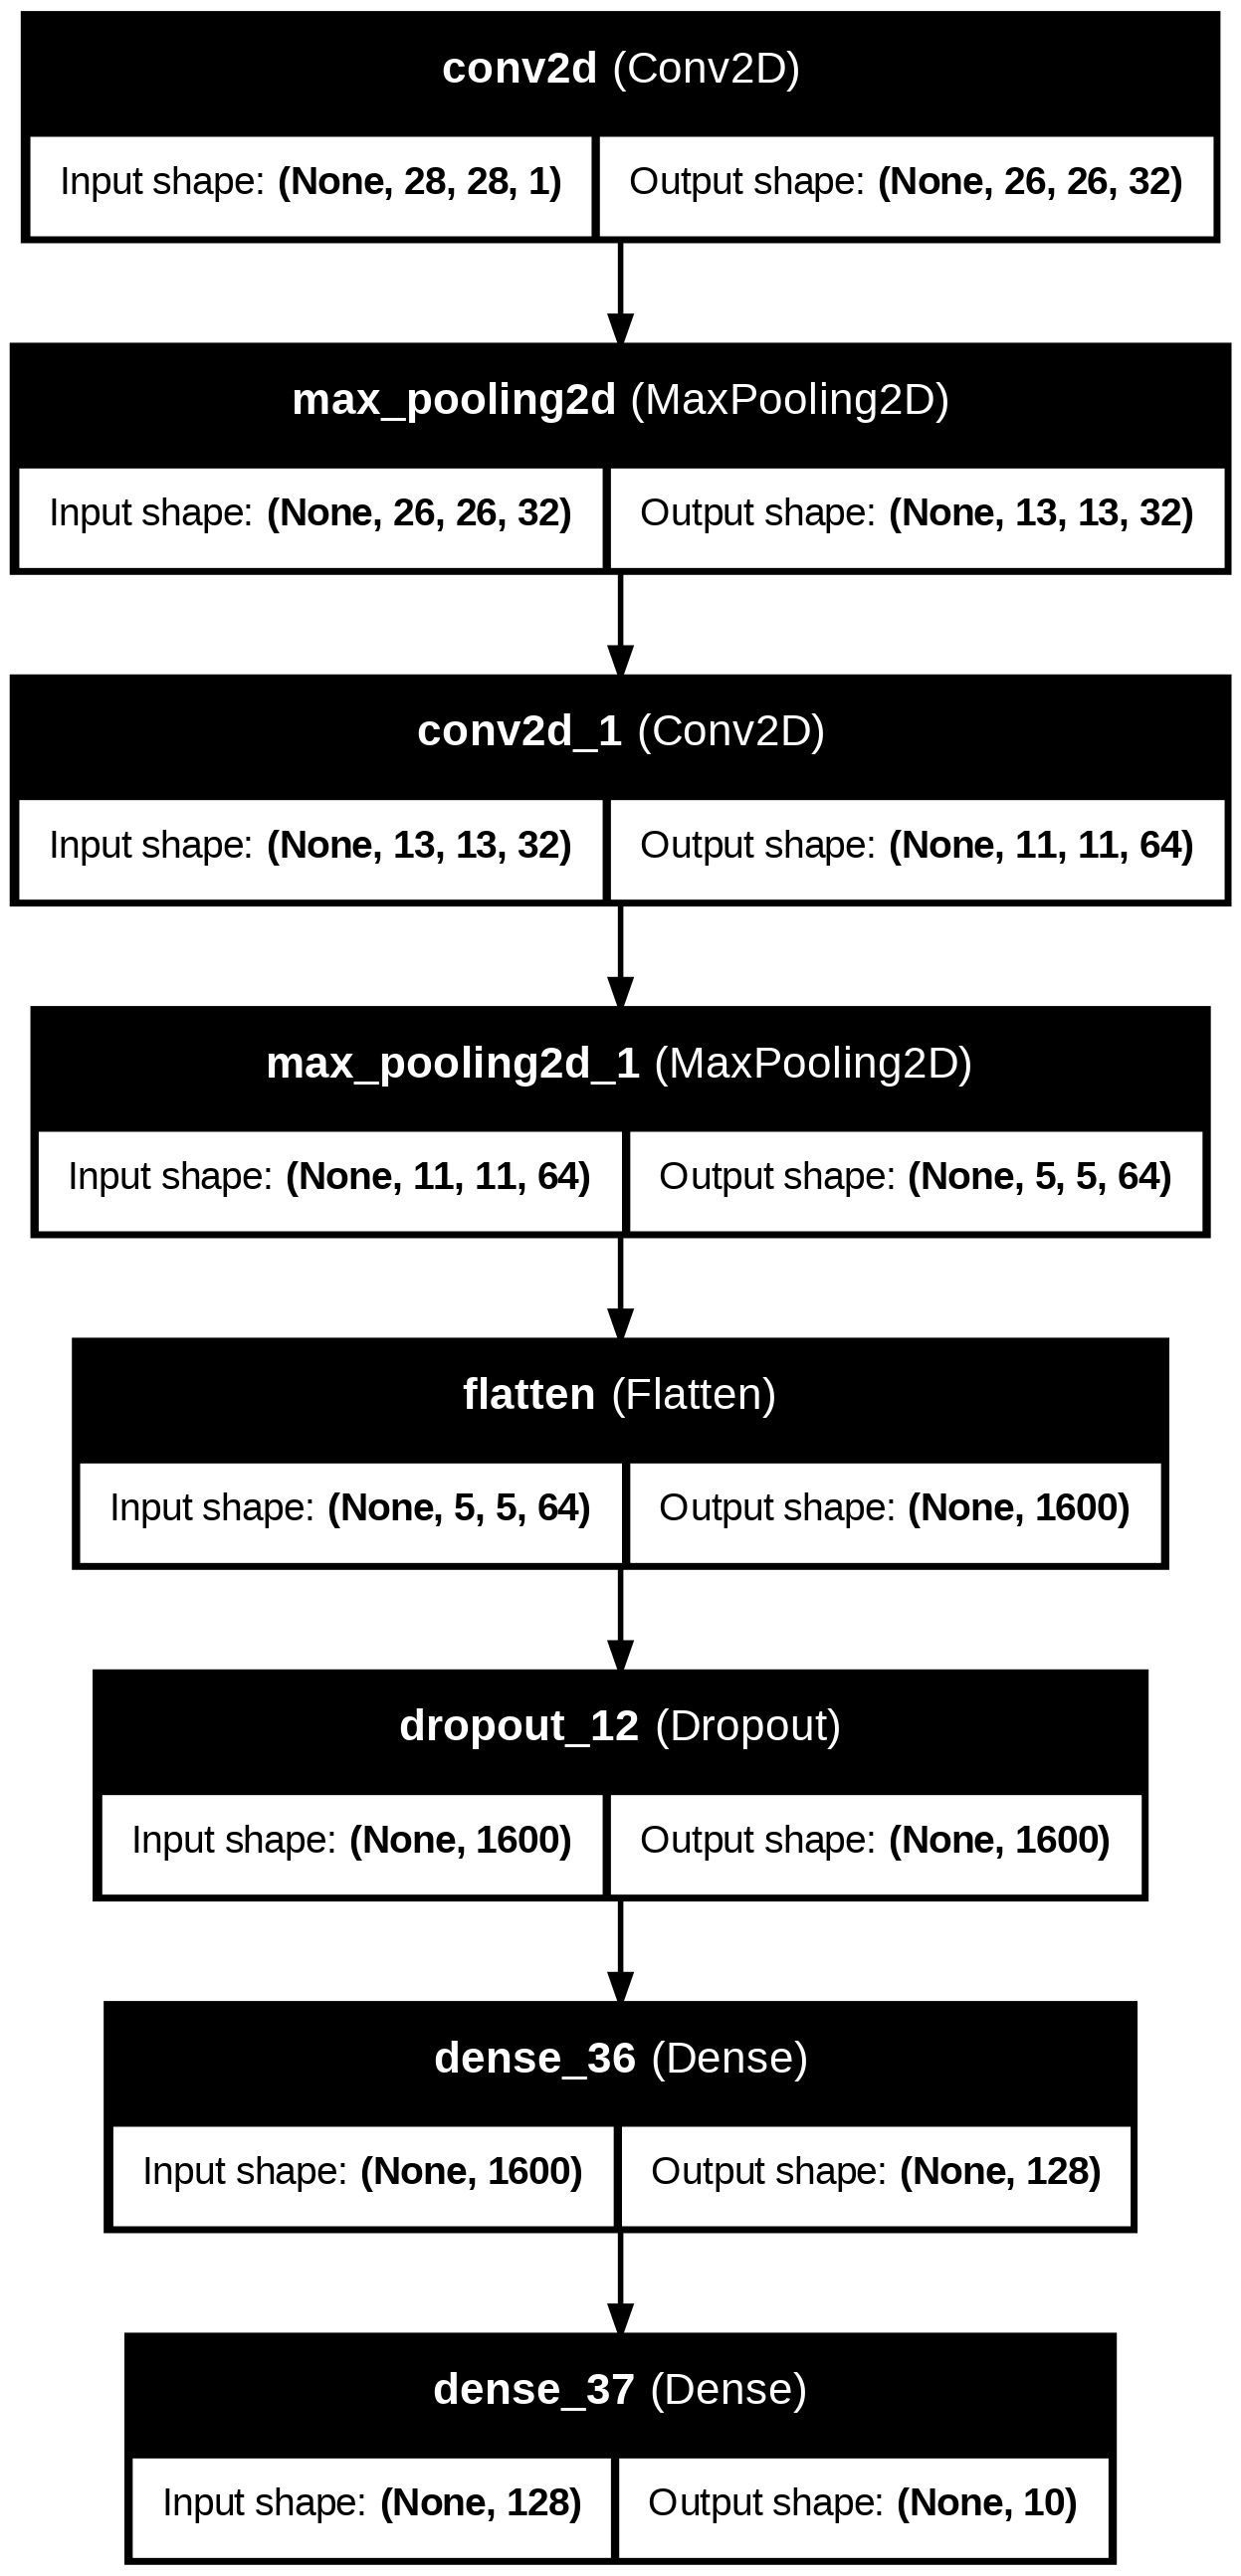

In [57]:
model_cnn = cnn_model()
print(f'{model_cnn.summary()}')
plot_model(model_cnn, to_file="model_cnn.png",
               show_shapes=True, show_layer_names=True)

In [58]:
history_cnn = model_cnn.fit(train_images, onehot_Y, validation_split=0.2, epochs=8, batch_size=128)

Epoch 1/8
375/375 ━━━━━━━━━━━━━━━━━━━━ 44s 116ms/step - accuracy: 0.3766 - loss: 1.7600 - val_accuracy: 0.7288 - val_loss: 0.8245
Epoch 2/8
375/375 ━━━━━━━━━━━━━━━━━━━━ 43s 114ms/step - accuracy: 0.7657 - loss: 0.7381 - val_accuracy: 0.8650 - val_loss: 0.4496
Epoch 3/8
375/375 ━━━━━━━━━━━━━━━━━━━━ 81s 111ms/step - accuracy: 0.8521 - loss: 0.4736 - val_accuracy: 0.8987 - val_loss: 0.3281
Epoch 4/8
375/375 ━━━━━━━━━━━━━━━━━━━━ 81s 109ms/step - accuracy: 0.8908 - loss: 0.3502 - val_accuracy: 0.9150 - val_loss: 0.2829
Epoch 5/8
375/375 ━━━━━━━━━━━━━━━━━━━━ 82s 111ms/step - accuracy: 0.9119 - loss: 0.2809 - val_accuracy: 0.9175 - val_loss: 0.2642
Epoch 6/8
375/375 ━━━━━━━━━━━━━━━━━━━━ 82s 112ms/step - accuracy: 0.9230 - loss: 0.2457 - val_accuracy: 0.9305 - val_loss: 0.2240
Epoch 7/8
375/375 ━━━━━━━━━━━━━━━━━━━━ 81s 110ms/step - accuracy: 0.9347 - loss: 0.2093 - val_accuracy: 0.9294 - val_loss: 0.2311
Epoch 8/8
375/375 ━━━━━━━━━━━━━━━━━━━━ 43s 115ms/step - accuracy: 0.9401 - loss: 0.1878 - 

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


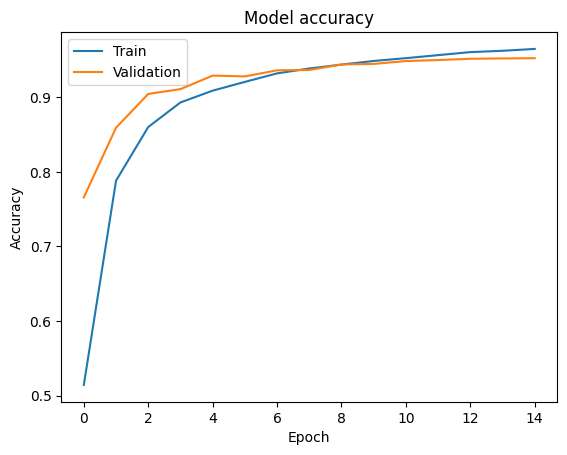

In [ ]:
print(history_cnn.history.keys())
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


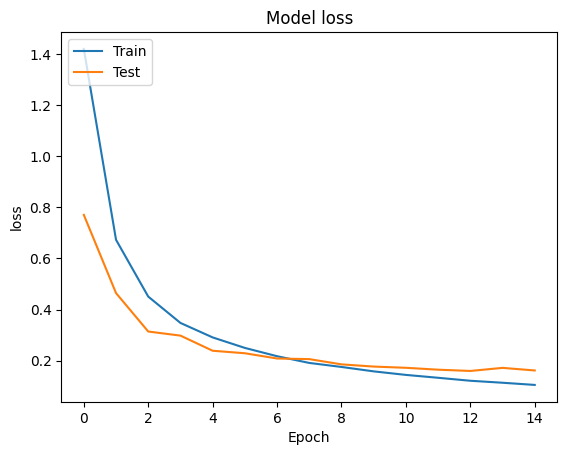

In [ ]:
print(history_cnn.history.keys())
plt.plot(history_cnn.history['loss'])
plt.plot(history_cnn.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
model_cnn.evaluate(test_images, onehot_Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9378 - loss: 0.2234


[0.19072376191616058, 0.9455999732017517]

In [ ]:
y_pred_cnn = model_cnn.predict(test_images)
y_pred_cnn_classes = np.argmax(y_pred,axis = 1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


<Axes: >

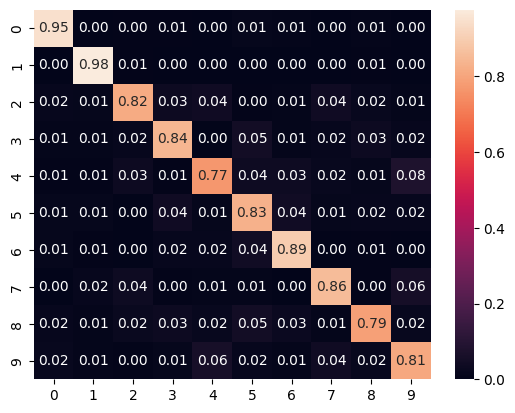

In [ ]:
sns.heatmap(sklearn.metrics.confusion_matrix(test_labels, y_pred_cnn_classes, normalize="true"), fmt=".2f", annot=True)

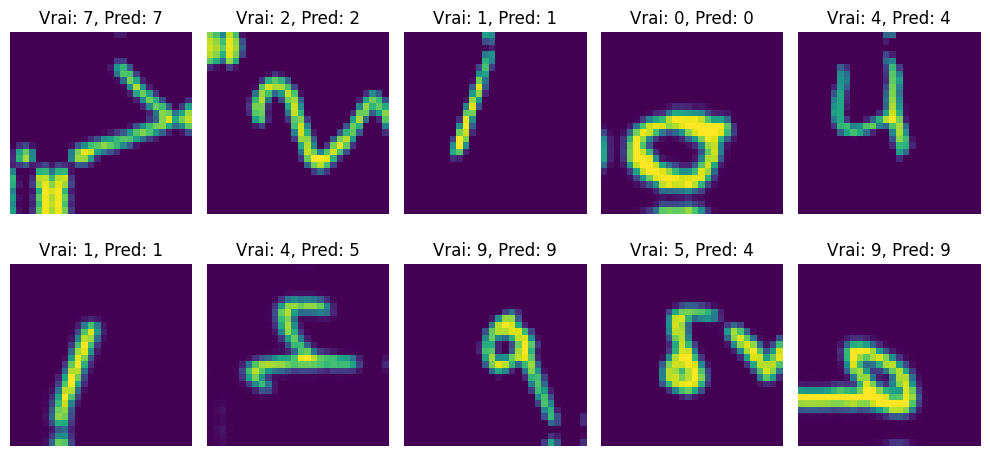

In [ ]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_images[i].reshape(28, 28))
    plt.axis('off')
    plt.title(f"Vrai: {test_labels[i]}, Pred: {y_pred_cnn_classes[i]}")
plt.tight_layout()
plt.show()

## Cross Validation

In [59]:
#history = model.fit(train_images_flat, onehot_Y, validation_split = 0.2, epochs=20, batch_size=128)
# Cross validation
# Variables to store the best model and precision
models_fold = []
fold_val_losses = []
fold_val_accuracies = []
fold_train_losses = []
fold_train_accuracies = []
not_all_val_losses = []
not_all_val_accuracies = []
not_all_train_losses = []
not_all_train_accuracies = []

# KFold configuration
kfold = KFold(n_splits=5, shuffle=True)

# Fold course
for fold, (train_idx, val_idx) in enumerate(kfold.split(train_images)):
    print(f"Fold {fold+1}")

    # Creating the template for this fold
    model = cnn_model()

    # Separate training and validation data for this fold
    X_fold_train, X_fold_val = train_images[train_idx], train_images[val_idx]
    Y_fold_train, Y_fold_val = onehot_Y[train_idx], onehot_Y[val_idx]

    # save train history
    history = model.fit(X_fold_train, Y_fold_train, validation_data=(X_fold_val, Y_fold_val),
                        epochs=8, batch_size=128, verbose=0)

    # If this is the best accuracy so far, we save the model
    models_fold.append(model)

    # Save losses and details for this fold
    fold_train_losses.append(history.history['loss'])
    fold_train_accuracies.append(history.history['accuracy'])
    fold_val_losses.append(history.history['val_loss'])
    fold_val_accuracies.append(history.history['val_accuracy'])
    not_all_train_losses.append(history.history['loss'][-1])
    not_all_train_accuracies.append(history.history['accuracy'][-1])
    not_all_val_losses.append(history.history['val_loss'][-1])
    not_all_val_accuracies.append(history.history['val_accuracy'][-1])


Fold 1
Fold 2
Fold 3
Fold 4
Fold 5


In [60]:
mean_total_loss = np.mean(not_all_val_losses)
mean_total_accuracy = np.mean(not_all_val_accuracies)
std_val_loss = np.std(not_all_val_losses)
std_val_accuracy = np.std(not_all_val_accuracies)
print(f"Mean val losses: {mean_total_loss}")
print(f"Mean val accuracies: {mean_total_accuracy}")
print(f"Std val losses: {std_val_loss}")
print(f"Std val accuracies: {std_val_accuracy}")

mean_total_loss = np.mean(not_all_train_losses)
mean_total_accuracy = np.mean(not_all_train_accuracies)
std_train_loss = np.std(not_all_train_losses)
std_train_accuracy = np.std(not_all_train_accuracies)
print(f"Mean train losses: {mean_total_loss}")
print(f"Mean train accuracies: {mean_total_accuracy}")
print(f"Std train losses: {std_train_loss}")
print(f"Std train accuracies: {std_train_accuracy}")

Mean val losses: 0.2189011514186859
Mean val accuracies: 0.9332000017166138
Std val losses: 0.003584956809771208
Std val accuracies: 0.0014602218049132164
Mean train losses: 0.19195262789726258
Mean train accuracies: 0.9391499996185303
Std train losses: 0.0073826107911200345
Std train accuracies: 0.0020519797902095373


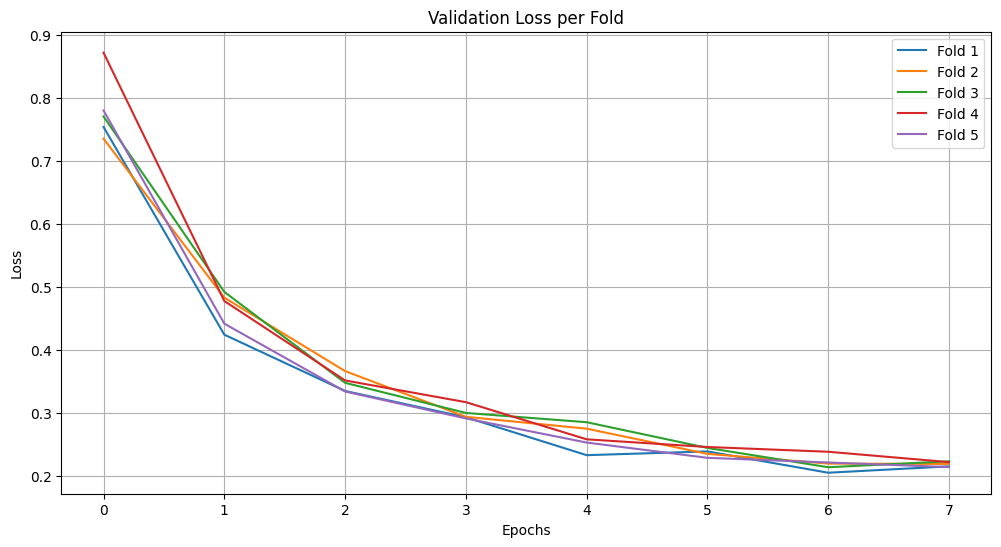

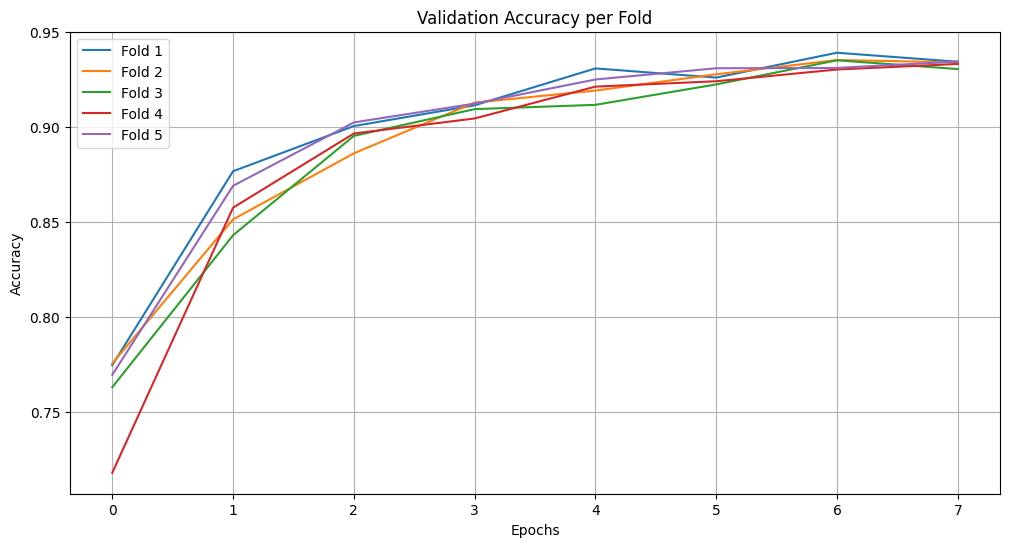

In [61]:
# Trace losses
plt.figure(figsize=(12, 6))

# Validation curves for each fold
for i in range(len(fold_val_losses)):
    plt.plot(fold_val_losses[i], label=f'Fold {i+1}')

plt.title('Validation Loss per Fold')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

# Tracing precision
plt.figure(figsize=(12, 6))

# Precision curves for each fold
for i in range(len(fold_val_accuracies)):
    plt.plot(fold_val_accuracies[i], label=f'Fold {i+1}')

plt.title('Validation Accuracy per Fold')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

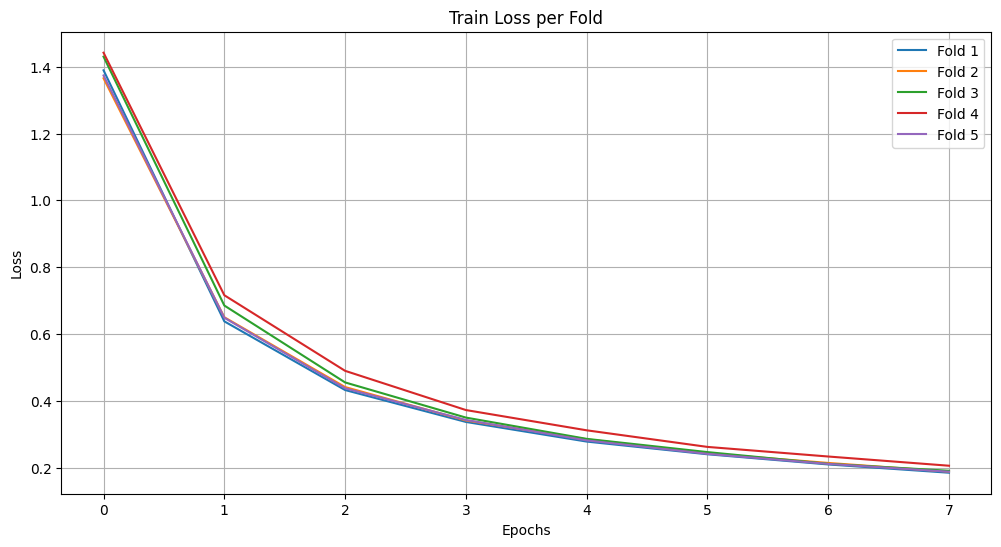

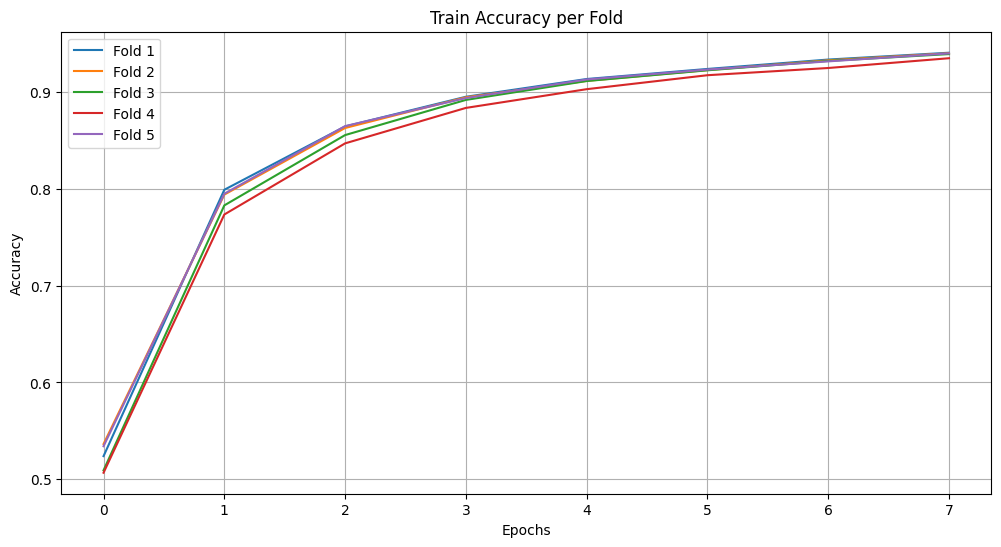

In [62]:
# Trace losses
plt.figure(figsize=(12, 6))

# Validation curves for each fold
for i in range(len(fold_train_losses)):
    plt.plot(fold_train_losses[i], label=f'Fold {i+1}')

plt.title('Train Loss per Fold')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

# Tracing precision
plt.figure(figsize=(12, 6))

# Precision curves for each fold
for i in range(len(fold_train_accuracies)):
    plt.plot(fold_train_accuracies[i], label=f'Fold {i+1}')

plt.title('Train Accuracy per Fold')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [63]:
test_models_accuracy = []
test_models_loss = []
for mod in models_fold:
    res = mod.evaluate(test_images, onehot_Y_test)
    test_models_loss.append(res[0])
    test_models_accuracy.append(res[1])
print("Test models accuracy:", sum(test_models_accuracy)/len(test_models_accuracy))
print("Test models loss:", sum(test_models_loss)/len(test_models_loss))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9315 - loss: 0.2221
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9277 - loss: 0.2339
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9287 - loss: 0.2319
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9260 - loss: 0.2436
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9291 - loss: 0.2321
Test models accuracy: 0.9373399972915649
Test models loss: 0.20375969707965852


In [64]:
mean_accuracy = np.mean(test_models_accuracy)
std_accuracy = np.std(test_models_accuracy)

mean_loss = np.mean(test_models_loss)
std_loss = np.std(test_models_loss)

# Affichage des résultats
print(f"Test models mean accuracy: {mean_accuracy * 100:.2f}% (± {std_accuracy * 100:.2f}%)")
print(f"Test models mean loss: {mean_loss:.4f} (± {std_loss:.4f})")

Test models mean accuracy: 93.73% (± 0.06%)
Test models mean loss: 0.2038 (± 0.0035)


In [65]:
print(test_models_accuracy)
print(test_models_loss)

[0.9380999803543091, 0.9369999766349792, 0.9376000165939331, 0.9363999962806702, 0.9376000165939331]
[0.20008742809295654, 0.20179158449172974, 0.20667517185211182, 0.20910495519638062, 0.20113934576511383]
